First, I will import the packages that I will use to clean and analyze the provided data. Next I will load the data and begin inspecting and cleaning it.

In [40]:
#Import data manipulation packages
import pandas as pd
import numpy as np

#Import data visualization packages
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#Import packages to plot location data
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
#from pyogrio import read_dataframe, read_info
import plotly.express as px
from geopy.geocoders import Nominatim


from IPython.display import HTML


In [2]:
#Load csv data
networkData = pd.read_csv("Data/dataset_exercise_prompt1_raw.csv")

#Check loaded data
networkData.head()

sessionid            timestamp  sliceNumber next  directRTT  \
0  9204446016905925023  2021-06-01 19:57:46           31  NaN    156.593   
1  9204446016905925023  2021-06-01 19:56:56           26  NaN    156.325   
2  9204446016905925023  2021-06-01 19:52:46            1  NaN    156.199   
3  9204446016905925023  2021-06-01 19:59:26           41  NaN    157.109   
4  9204446016905925023  2021-06-01 19:56:26           23  NaN    156.165   

   directJitter  directPacketLoss  nextRTT  nextJitter  nextPacketLoss  \
0      93.54288               0.0      NaN         NaN             NaN   
1     106.19237               0.0      NaN         NaN             NaN   
2     118.74964               0.0      NaN         NaN             NaN   
3     103.05694               0.0      NaN         NaN             NaN   
4      88.75074               0.0      NaN         NaN             NaN   

              userHash  latitude  longitude  connectionType  platformType  
0 -2684141072887182057   14.6083   -61.0733               2             5  
1 -2684141072887182057   14.6083   -61.0733               2             5  
2 -2684141072887182057   14.6083   -61.0733               2             5  
3 -2684141072887182057   14.6083   -61.0733               2             5  
4 -2684141072887182057   14.6083   -61.0733               2             5

In [3]:
#Check dataset parameters
allRows = networkData.shape[0]
print("Total rows in input dataset:", allRows)

Total rows in input dataset: 1207469


## Data Cleaning

Now that the data is loaded from the provided CSV file, I will begin to clean it.

In [4]:
#Check for and drop duplicate rows
networkData.drop_duplicates(inplace=True)
nonDupRows = networkData.shape[0]
print("Dropped duplicate rows:", allRows-nonDupRows)
print("Rows after duplicates dropped:", nonDupRows)

Dropped duplicate rows: 20486
Rows after duplicates dropped: 1186983


So far I have loaded the dataset and done some very first cleaning steps to check for and remove duplicate rows. I have found and removed 20486 duplicate rows from the input data. Given that each row is timestamped and associated with a specific user, I see no reason that duplicate entries should exist in the data, so this is the first issue that I would forward to the software engineering team.

I see from the above inspection that the sliceNumber is not listed in order, so I will sort the data for easier inspection.

In [5]:
#sort the data for easier inspection
networkData.sort_values(by = ['sessionid', 'timestamp', 'sliceNumber'], na_position = 'first', inplace=True)
networkData.head(475)

sessionid            timestamp  sliceNumber  next  \
762192 -9222766980438305802  2021-06-01 12:39:17            0   NaN   
762212 -9222766980438305802  2021-06-01 12:39:27            1   NaN   
762181 -9222766980438305802  2021-06-01 12:39:37            2   NaN   
762197 -9222766980438305802  2021-06-01 12:39:47            3   NaN   
762171 -9222766980438305802  2021-06-01 12:39:57            4   NaN   
...                     ...                  ...          ...   ...   
882811 -9217431032676677954  2021-06-07 16:29:19            0   NaN   
882810 -9217431032676677954  2021-06-07 16:29:29            1   NaN   
882665 -9217431032676677954  2021-06-07 16:29:39            2  True   
882816 -9217431032676677954  2021-06-07 16:29:49            3  True   
882815 -9217431032676677954  2021-06-07 16:29:59            4  True   

        directRTT  directJitter  directPacketLoss  nextRTT  nextJitter  \
762192   0.000000      0.000000               0.0      NaN         NaN   
762212  25.069988      4.055951               0.0      NaN         NaN   
762181  25.136683      4.252147               0.0      NaN         NaN   
762197  25.100529      7.488617               0.0      NaN         NaN   
762171  25.160007      3.660213               0.0      NaN         NaN   
...           ...           ...               ...      ...         ...   
882811        NaN      0.000000               0.0      NaN         NaN   
882810        NaN     26.422790               0.0      NaN         NaN   
882665        NaN     43.884766               0.0  10.1096    0.288987   
882816        NaN     26.137600               0.0   9.4893    0.830218   
882815        NaN     36.065056               0.0   9.4767    0.888494   

        nextPacketLoss             userHash  latitude  longitude  \
762192             NaN -9102495143376997791   41.8183   -87.6095   
762212             NaN -9102495143376997791   41.8183   -87.6095   
762181             NaN -9102495143376997791   41.8183   -87.6095   
762197             NaN -9102495143376997791   41.8183   -87.6095   
762171             NaN -9102495143376997791   41.8183   -87.6095   
...                ...                  ...       ...        ...   
882811             NaN -5761252730941779099   49.1228     6.1742   
882810             NaN -5761252730941779099   49.1228     6.1742   
882665             0.0 -5761252730941779099   49.1228     6.1742   
882816             0.0 -5761252730941779099   49.1228     6.1742   
882815             0.0 -5761252730941779099   49.1228     6.1742   

        connectionType  platformType  
762192               2             7  
762212               2             7  
762181               2             7  
762197               2             7  
762171               2             7  
...                ...           ...  
882811               1             1  
882810               1             1  
882665               1             1  
882816               1             1  
882815               1             1  

[475 rows x 15 columns]

I also notice that the 'next' column appears to empty (NaN) when the slice is not being accelerated. For the sake of my EDA, I will assume that these values are equivalent to 'False', but in a real-life scenario I would seek aditional confirmation that this was the case and would encourage the engineers to explicitly note this in the data workflow to avoid any confusion (null values could actually denote missing data rather than Network Next acceleration simply not being applied, but there is no way of differentiating here).

In [6]:
#replace empty cells in the 'next' flag with 'False'
networkData['next'].fillna(False, inplace=True)
networkData.head()

sessionid            timestamp  sliceNumber   next  \
762192 -9222766980438305802  2021-06-01 12:39:17            0  False   
762212 -9222766980438305802  2021-06-01 12:39:27            1  False   
762181 -9222766980438305802  2021-06-01 12:39:37            2  False   
762197 -9222766980438305802  2021-06-01 12:39:47            3  False   
762171 -9222766980438305802  2021-06-01 12:39:57            4  False   

        directRTT  directJitter  directPacketLoss  nextRTT  nextJitter  \
762192   0.000000      0.000000               0.0      NaN         NaN   
762212  25.069988      4.055951               0.0      NaN         NaN   
762181  25.136683      4.252147               0.0      NaN         NaN   
762197  25.100529      7.488617               0.0      NaN         NaN   
762171  25.160007      3.660213               0.0      NaN         NaN   

        nextPacketLoss             userHash  latitude  longitude  \
762192             NaN -9102495143376997791   41.8183   -87.6095   
762212             NaN -9102495143376997791   41.8183   -87.6095   
762181             NaN -9102495143376997791   41.8183   -87.6095   
762197             NaN -9102495143376997791   41.8183   -87.6095   
762171             NaN -9102495143376997791   41.8183   -87.6095   

        connectionType  platformType  
762192               2             7  
762212               2             7  
762181               2             7  
762197               2             7  
762171               2             7

I notice another potential issue in the data- a 0th slice appears to exist for each session which has zero-valued entries in direct latency, jitter, and packet loss. This seems suspicious to me, and it is something else that I would consult with others about and point out to the software team. For now, I will drop these rows, but again, in a real business scenario I would seek to ensure that these rows are indeed incorrect and not just a gap in my domain knowledge. In the case of this EDA, I do not believe that dropping these rows will massively alter any trends observed, but will make the analysis more accurate.

In [7]:
#drop rows with 0th slice since I believe that the information is incorrect
#also now define a new dataframe for cleaned data since I am now making cuts
networkData_cleaned = networkData.drop(networkData[networkData['sliceNumber']==0].index)

The dataset notes provided indicate that "a slice will always have a directRTT, directJitter, and directPacketLoss associated with it". So, I will next verify that all entries contain values for these parameters. For good measure, I will also check for entries with empty values for other fields that do not expect them (NaN values appear to be common and acceptable in the 'next'-related fields).

In [8]:
#check if there are any unexpected null values. Special attention to directRTT, directJitter, and directPacketLoss
print("number of rows where directRTT is missing:", networkData_cleaned['directRTT'].isnull().sum())
print("number of rows where directJitter is missing:", networkData_cleaned['directJitter'].isnull().sum())
print("number of rows where directPacketLoss is missing:", networkData_cleaned['directPacketLoss'].isnull().sum())
print("number of rows where sessionid is missing:", networkData_cleaned['sessionid'].isnull().sum())
print("number of rows where timestamp is missing:", networkData_cleaned['timestamp'].isnull().sum())
print("number of rows where sliceNumber is missing:", networkData_cleaned['sliceNumber'].isnull().sum())
print("number of rows where userHash is missing:", networkData_cleaned['userHash'].isnull().sum())
print("number of rows where latitude is missing:", networkData_cleaned['latitude'].isnull().sum())
print("number of rows where longitude is missing:", networkData_cleaned['longitude'].isnull().sum())
print("number of rows where connectionType is missing:", networkData_cleaned['connectionType'].isnull().sum())
print("number of rows where platformType is missing:", networkData_cleaned['platformType'].isnull().sum())
print("number of rows where sessionid is missing:", networkData_cleaned['sessionid'].isnull().sum())
print("number of rows where timestamp is missing:", networkData_cleaned['timestamp'].isnull().sum())

number of rows where directRTT is missing: 148272
number of rows where directJitter is missing: 0
number of rows where directPacketLoss is missing: 0
number of rows where sessionid is missing: 0
number of rows where timestamp is missing: 0
number of rows where sliceNumber is missing: 0
number of rows where userHash is missing: 0
number of rows where latitude is missing: 0
number of rows where longitude is missing: 0
number of rows where connectionType is missing: 0
number of rows where platformType is missing: 0
number of rows where sessionid is missing: 0
number of rows where timestamp is missing: 0


The above shows that the only missing data comes from directRTT, but approx. 150,000 entries in the dataset have missing data in the this column. That might hint at a significant problem in data collection that definitely warrants the attention of the software team. For the sake of this exploratory analysis, I will drop the entries with missing data from the dataset, as the remaining data should still be sufficient to identify insights.

In [9]:
#drop rows with missing directRTT data
networkData_cleaned.drop(networkData_cleaned[networkData_cleaned['directRTT'].isnull()].index, inplace=True)

In [10]:
#check number of rows after cleaning
print("Rows after cleaning:", networkData_cleaned.shape[0])

Rows after cleaning: 1017753


In a similar vein, I want to check if there are any entries where next=True and the nextRTT, nextJitter, or nextPacketLoss are empty, as this would also be problematic.

In [11]:
#check if there are any unexpected null values in "next..." columns
print("number of rows where next==True and nextRTT is missing:", networkData_cleaned[networkData_cleaned['next']==True]['nextRTT'].isnull().sum())
print("number of rows where next==True and nextJitter is missing:", networkData_cleaned[networkData_cleaned['next']==True]['nextJitter'].isnull().sum())
print("number of rows where next==True and nextPacketLoss is missing:", networkData_cleaned[networkData_cleaned['next']==True]['nextPacketLoss'].isnull().sum())

number of rows where next==True and nextRTT is missing: 29179
number of rows where next==True and nextJitter is missing: 29179
number of rows where next==True and nextPacketLoss is missing: 29179


It seems I have identified another issue in the dataset to forward to the engineering team! There are 29179 entries where Network Next's service is accelerating the slice, but no nextRTT, nextJitter, or nextPacketLoss information is recorded. I will look at some of these entries by eye to see if I notice anything...

In [12]:
networkData_cleaned[networkData_cleaned['next']==True & networkData_cleaned['nextRTT'].isnull()].head(100)

sessionid            timestamp  sliceNumber  next  \
289325 -9216544692736712906  2021-06-05 15:26:50           10  True   
289319 -9216544692736712906  2021-06-05 15:27:00           11  True   
289310 -9216544692736712906  2021-06-05 15:27:10           12  True   
289334 -9216544692736712906  2021-06-05 15:27:20           13  True   
289336 -9216544692736712906  2021-06-05 15:27:30           14  True   
...                     ...                  ...          ...   ...   
363769 -9208178178689667298  2021-06-02 10:14:57           22  True   
363758 -9208178178689667298  2021-06-02 10:15:07           23  True   
363833 -9208178178689667298  2021-06-02 10:15:17           24  True   
363992 -9208178178689667298  2021-06-02 10:15:27           25  True   
363964 -9208178178689667298  2021-06-02 10:15:37           26  True   

        directRTT  directJitter  directPacketLoss  nextRTT  nextJitter  \
289325  31.964690     49.119537         40.000000      NaN         NaN   
289319  32.871020    109.910310         30.666666      NaN         NaN   
289310  30.805923     59.224820          0.000000      NaN         NaN   
289334  31.770678     71.305790          1.369863      NaN         NaN   
289336  31.482740     67.455030          3.947368      NaN         NaN   
...           ...           ...               ...      ...         ...   
363769  12.736000      9.063397          8.974359      NaN         NaN   
363758  12.918900      8.925898          2.631579      NaN         NaN   
363833  12.876300      7.859960          6.410256      NaN         NaN   
363992  12.949200      9.283266          5.128205      NaN         NaN   
363964  12.790400      8.705525          1.265823      NaN         NaN   

        nextPacketLoss             userHash  latitude  longitude  \
289325             NaN  3201698728542134698   55.8486    -4.2216   
289319             NaN  3201698728542134698   55.8486    -4.2216   
289310             NaN  3201698728542134698   55.8486    -4.2216   
289334             NaN  3201698728542134698   55.8486    -4.2216   
289336             NaN  3201698728542134698   55.8486    -4.2216   
...                ...                  ...       ...        ...   
363769             NaN  8800598211479180928   38.2676   140.8700   
363758             NaN  8800598211479180928   38.2676   140.8700   
363833             NaN  8800598211479180928   38.2676   140.8700   
363992             NaN  8800598211479180928   38.2676   140.8700   
363964             NaN  8800598211479180928   38.2676   140.8700   

        connectionType  platformType  
289325               2             7  
289319               2             7  
289310               2             7  
289334               2             7  
289336               2             7  
...                ...           ...  
363769               1             1  
363758               1             1  
363833               1             1  
363992               1             1  
363964               1             1  

[100 rows x 15 columns]

Nothing jumps out at me as a commonality between the sessions where this problem occurs, so I propose dropping these slices for this EDA. As this is a relatively small number of rows compared to the full dataset, I do not think that dropping them will negatively impact the accuracy of any conclusions drawn. An argument could be made to drop the entries for the entire sessions that contain these problematic rows, but for now I will assume that the remaining rows from these sessions contain accurate information. Again, in an actual business scenario I would consult with others about this issue to try to understand the cause of the missing data and if it is something that could impact the accuracy of the data for the full sessions.

In [13]:
networkData_cleaned.drop(networkData_cleaned[networkData_cleaned['next']==True & networkData_cleaned['nextRTT'].isnull()].index, inplace=True)

I will ensure that all of these problematic rows were dropped...

In [14]:
print("number of rows where next==True and nextRTT is missing:", networkData_cleaned[networkData_cleaned['next']==True]['nextRTT'].isnull().sum())
print("number of rows where next==True and nextJitter is missing:", networkData_cleaned[networkData_cleaned['next']==True]['nextJitter'].isnull().sum())
print("number of rows where next==True and nextPacketLoss is missing:", networkData_cleaned[networkData_cleaned['next']==True]['nextPacketLoss'].isnull().sum())

number of rows where next==True and nextRTT is missing: 0
number of rows where next==True and nextJitter is missing: 0
number of rows where next==True and nextPacketLoss is missing: 0


I will also check for any zeros in the data where I would not expect them.

In [15]:
#check if there are any unexpected zero values. I will only check columns where I believe that a zero value would be nonsensical
print("number of rows where sessionid is zero:", networkData_cleaned[networkData_cleaned['sessionid']==0.0].count())
print("number of rows where timestamp is zero:", networkData_cleaned[networkData_cleaned['timestamp']==0.0].count())
print("number of rows where userHash is zero:", networkData_cleaned[networkData_cleaned['userHash']==0.0].count())
print("number of rows where latitude AND longitude are zero:", networkData_cleaned[(networkData_cleaned['latitude']==0.0) & (networkData_cleaned['longitude']==0.0)].count())
print("number of rows where platformType is zero:", networkData_cleaned[networkData_cleaned['platformType']==0.0].count())

#networkData_cleaned[(networkData_cleaned['latitude']==0.0) & (networkData_cleaned['longitude']==0.0)].head(500)

number of rows where sessionid is zero: sessionid           0
timestamp           0
sliceNumber         0
next                0
directRTT           0
directJitter        0
directPacketLoss    0
nextRTT             0
nextJitter          0
nextPacketLoss      0
userHash            0
latitude            0
longitude           0
connectionType      0
platformType        0
dtype: int64
number of rows where timestamp is zero: sessionid           0
timestamp           0
sliceNumber         0
next                0
directRTT           0
directJitter        0
directPacketLoss    0
nextRTT             0
nextJitter          0
nextPacketLoss      0
userHash            0
latitude            0
longitude           0
connectionType      0
platformType        0
dtype: int64
number of rows where userHash is zero: sessionid           0
timestamp           0
sliceNumber         0
next                0
directRTT           0
directJitter        0
directPacketLoss    0
nextRTT             0
nextJitter         

Messy formatting aside, I find that there are in fact some unexpected zeros in the form of (latitude, longitude) points. A quick Google search reveals that the point (0, 0) is located in the Gulf of Guinea in the Atlantic Ocean. I think it is safe to say that there are no users playing a video game in the middle of the ocean, so I will drop these entries from the dataset to be safe. One could argue that the other columns are not problematic, but since I do plan to look at location data in my EDA and the total size of the dataset is large enough to still easily detect trends even without these entries, I am choosing to simply drop them.

In [16]:
networkData_cleaned.drop(networkData_cleaned[(networkData_cleaned['latitude']==0.0) & (networkData_cleaned['longitude']==0.0)].index, inplace=True)

In [17]:
#Inspect the final cleaned dataset
print(networkData_cleaned.shape)
networkData_cleaned.head(100)

(967308, 15)


sessionid            timestamp  sliceNumber   next  \
762212 -9222766980438305802  2021-06-01 12:39:27            1  False   
762181 -9222766980438305802  2021-06-01 12:39:37            2  False   
762197 -9222766980438305802  2021-06-01 12:39:47            3  False   
762171 -9222766980438305802  2021-06-01 12:39:57            4  False   
762186 -9222766980438305802  2021-06-01 12:40:07            5  False   
...                     ...                  ...          ...    ...   
85230  -9222000346158437530  2021-06-06 19:14:42           54  False   
85222  -9222000346158437530  2021-06-06 19:14:52           55  False   
85238  -9222000346158437530  2021-06-06 19:15:02           56  False   
85234  -9222000346158437530  2021-06-06 19:15:12           57  False   
85208  -9222000346158437530  2021-06-06 19:15:22           58  False   

        directRTT  directJitter  directPacketLoss  nextRTT  nextJitter  \
762212  25.069988      4.055951          0.000000      NaN         NaN   
762181  25.136683      4.252147          0.000000      NaN         NaN   
762197  25.100529      7.488617          0.000000      NaN         NaN   
762171  25.160007      3.660213          0.000000      NaN         NaN   
762186  25.123772      5.834589          0.000000      NaN         NaN   
...           ...           ...               ...      ...         ...   
85230   30.167427      8.152986          0.000000      NaN         NaN   
85222   30.075254      4.863496          0.000000      NaN         NaN   
85238   30.100998      6.374352          0.000000      NaN         NaN   
85234   30.284306      5.893955          1.298701      NaN         NaN   
85208   30.290570      4.231342          0.000000      NaN         NaN   

        nextPacketLoss             userHash  latitude  longitude  \
762212             NaN -9102495143376997791   41.8183   -87.6095   
762181             NaN -9102495143376997791   41.8183   -87.6095   
762197             NaN -9102495143376997791   41.8183   -87.6095   
762171             NaN -9102495143376997791   41.8183   -87.6095   
762186             NaN -9102495143376997791   41.8183   -87.6095   
...                ...                  ...       ...        ...   
85230              NaN  3815087660763149607   32.8685   -97.2863   
85222              NaN  3815087660763149607   32.8685   -97.2863   
85238              NaN  3815087660763149607   32.8685   -97.2863   
85234              NaN  3815087660763149607   32.8685   -97.2863   
85208              NaN  3815087660763149607   32.8685   -97.2863   

        connectionType  platformType  
762212               2             7  
762181               2             7  
762197               2             7  
762171               2             7  
762186               2             7  
...                ...           ...  
85230                2             7  
85222                2             7  
85238                2             7  
85234                2             7  
85208                2             7  

[100 rows x 15 columns]

## Data Cleaning Summary

I found the following problem areas in the dataset that I would pass to the software engineering team to correct in the data workflow:
- Duplicate rows existed in the data.
- The 'next' variable was left empty unless it was set to True. It would be better to explicity set it to False in the data workflow when acceleration is not active, as an empty value could mean something different (e.g. missing data).
- An entry exists for a 0th slice for each session that has zero-valued entries for directRTT, directJitter, and directPacketLoss. I do not expect that these are true values and I would speculate that this could possible arise from a problem in the data workflow.
- Entries existed with missing directRTT data. This data should always be available as per the dataset notes.
- Entries existed where 'next' is True, but no nextRTT, nextJitter, or nextPacketLoss was recorded.
- Entries existed where the user locations are at the latitude, longitude coordinate of (0, 0), which is located in the middle of the Atlantic Ocean. I would imagine that this is a problem to be fixed, and is possibly fixable by making sure to use a Null value rather than a zero if location is unknown.

For the sake of my EDA, I have dropped any problematic rows from the dataset, reducing the number of entries from 1207469 to 967308 in total.

## Exploratory data analysis

Now I have a cleaned dataset and am ready to start on exploratory data analysis!

#### Investigating per-slice network performance metrics

The most obvious starting point seems to be looking at the three performance indicators (latency, jitter, and packet loss) for slices with and without Network Next acceleration applied. I am choosing to look at per-slice values instead of per-session averages because I noticed while inspecting the data that one session can have a mix of slices with and without Next enabled. 

I will start by looking at average values undThis analysis can then be extended to check the performances on different connection and platform types.

In [18]:
#analyze per-slice performance indicator values with and without Network Next acceleration

#make dataframes with only slices where Next is active/innactive
networkData_next = networkData_cleaned[networkData_cleaned['next']==True]
networkData_nonNext = networkData_cleaned[networkData_cleaned['next']==False]

#calculate per-slice averages
totalEntries_overall = networkData_cleaned.shape[0]
totalEntries_next = networkData_next.shape[0]
totalEntries_nonNext = networkData_nonNext.shape[0]

avgDirectRTT_overall =  networkData_cleaned['directRTT'].sum()/totalEntries_overall
avgDirectRTT_nonNext =  networkData_nonNext['directRTT'].sum()/totalEntries_nonNext
avgDirectRTT_next =  networkData_next['directRTT'].sum()/totalEntries_next
avgNextRTT_next =  networkData_next['nextRTT'].sum()/totalEntries_next

avgDirectJitter_overall =  networkData_cleaned['directJitter'].sum()/totalEntries_overall
avgDirectJitter_nonNext =  networkData_nonNext['directJitter'].sum()/totalEntries_nonNext
avgDirectJitter_next =  networkData_next['directJitter'].sum()/totalEntries_next
avgNextJitter_next =  networkData_next['nextJitter'].sum()/totalEntries_next

avgDirectPacketLoss_overall =  networkData_cleaned['directPacketLoss'].sum()/totalEntries_overall
avgDirectPacketLoss_nonNext =  networkData_nonNext['directPacketLoss'].sum()/totalEntries_nonNext
avgDirectPacketLoss_next =  networkData_next['directPacketLoss'].sum()/totalEntries_next
avgNextPacketLoss_next =  networkData_next['nextPacketLoss'].sum()/totalEntries_next

print(avgDirectRTT_overall, avgDirectRTT_nonNext, avgDirectRTT_next, avgNextRTT_next)
print(avgDirectJitter_overall, avgDirectJitter_nonNext, avgDirectJitter_next, avgNextJitter_next)
print(avgDirectPacketLoss_overall, avgDirectPacketLoss_nonNext, avgDirectPacketLoss_next, avgNextPacketLoss_next)


48.987981038104714 35.436245593174995 81.09923299982513 38.05186248554629
13.242519795703272 11.300345343512495 17.844561611037577 15.641196686889987
1.0256695050209448 0.3351440528986392 2.66189070113176 1.9177900966064616


Text(0.5, 1.0, 'PacketLoss')

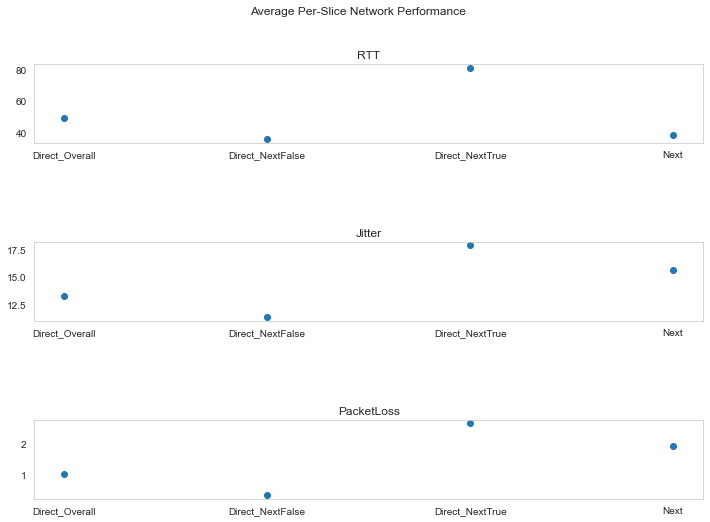

In [19]:
#plot average performance metrics
x = ['Direct_Overall', 'Direct_NextFalse', 'Direct_NextTrue', 'Next']
y_RTT = [avgDirectRTT_overall, avgDirectRTT_nonNext, avgDirectRTT_next, avgNextRTT_next]
y_Jitter = [avgDirectJitter_overall, avgDirectJitter_nonNext, avgDirectJitter_next, avgNextJitter_next]
y_PacketLoss = [avgDirectPacketLoss_overall, avgDirectPacketLoss_nonNext, avgDirectPacketLoss_next, avgNextPacketLoss_next]

fig, axs = plt.subplots(3, figsize=(12,8))
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
#gs = fig.add_gridspec(3, hspace=1)
#axs = gs.subplots()
fig.suptitle('Average Per-Slice Network Performance')
plt.subplots_adjust(hspace=1.25)

axs[0].scatter(x, y_RTT)
axs[0].set_title('RTT')
axs[1].scatter(x, y_Jitter)
axs[1].set_title('Jitter')
axs[2].scatter(x, y_PacketLoss)
axs[2].set_title('PacketLoss')

This is a very basic plot and it shows about what I would expect- that slices accelerated with Network Next's service have better performance metric scores across the board compared to the direct measurements when 'next' is true. Accelerated slices even perform slightly better on average in terms of latency (RTT) than direct network traffic when acceleration is not needed. Accelerated slices do however have a larger jitter and packet loss percentage on average compared to direct networks without acceleration and the aggrigate inclusive dataset.

However, simply using average values does not give all the details of what is going on, as it does not show the shape of the distributions, number of entries, etc. So next I would like to look at the distributions of the network performance metrics when acceleration is/isn't being applied.

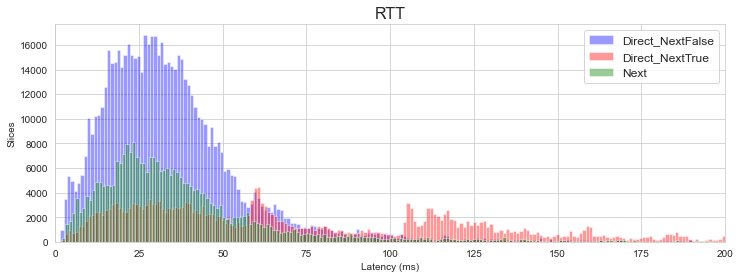

In [20]:
#Plot performance metric distributions- RTT
plt.figure(figsize=(12,4))
nBins = 200
plt.xlim(0, 200)
#plt.hist(networkData_cleaned[networkData_cleaned['directRTT']<200]['directRTT'], color='k', alpha=.4, label="Direct_Overall", bins=nBins)
plt.hist(networkData_nonNext[networkData_nonNext['directRTT']<200]['directRTT'], color='b', alpha=.4, label="Direct_NextFalse", bins=nBins)
plt.hist(networkData_next[networkData_next['directRTT']<200]['directRTT'], color='r', alpha=.4, label="Direct_NextTrue", bins=nBins)
plt.hist(networkData_next[networkData_next['nextRTT']<200]['nextRTT'], color='g', alpha=.4, label="Next", bins=nBins)
plt.legend(fontsize=12)
plt.title('RTT',fontsize=16)
plt.xlabel('Latency (ms)')
plt.ylabel('Slices')
plt.show()

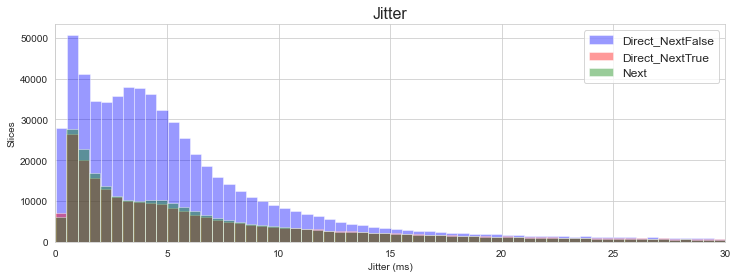

In [21]:
#Plot performance metric distributions- Jitter
plt.figure(figsize=(12,4))
nBins = 60
plt.xlim(0, 30)
plt.hist(networkData_nonNext[networkData_nonNext['directJitter']<30]['directJitter'], color='b', alpha=.4, label="Direct_NextFalse", bins=nBins)
plt.hist(networkData_next[networkData_next['directJitter']<30]['directJitter'], color='r', alpha=.4, label="Direct_NextTrue", bins=nBins)
plt.hist(networkData_next[networkData_next['nextJitter']<30]['nextJitter'], color='g', alpha=.4, label="Next", bins=nBins)
plt.legend(fontsize=12)
plt.title('Jitter',fontsize=16)
plt.xlabel('Jitter (ms)')
plt.ylabel('Slices')
plt.show()

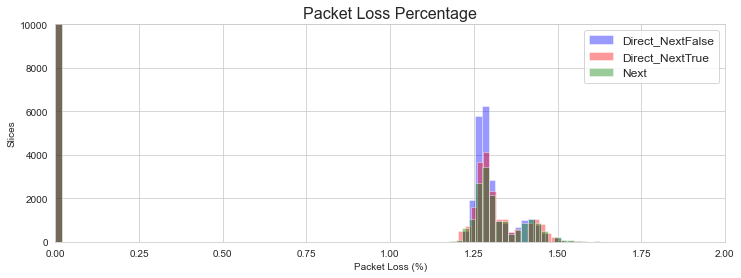

In [22]:
#Plot performance metric distributions- Packet Loss
plt.figure(figsize=(12,4))
nBins = 100
plt.xlim(0, 2)
plt.ylim(0,10000)
plt.hist(networkData_nonNext[networkData_nonNext['directPacketLoss']<2]['directPacketLoss'], color='b', alpha=.4, label="Direct_NextFalse", bins=nBins)
plt.hist(networkData_next[networkData_next['directPacketLoss']<2]['directPacketLoss'], color='r', alpha=.4, label="Direct_NextTrue", bins=nBins)
plt.hist(networkData_next[networkData_next['nextPacketLoss']<2]['nextPacketLoss'], color='g', alpha=.4, label="Next", bins=nBins)
plt.legend(fontsize=12)
plt.title('Packet Loss Percentage',fontsize=16)
plt.xlabel('Packet Loss (%)')
plt.ylabel('Slices')
plt.show()

For the above plots, I've decided to not show the full-dataset aggrigate distributions in an effort to maintain clarity and reduce clutter on the plots, opting to compare the direct[RTT/Jitter/PacketLoss] associated with unaccelerated slices and the direct[RTT/Jitter/PacketLoss] and next[RTT/Jitter/PacketLoss] distributions associated with the accelerated slices. I've also restricted the x-axis ranges so as to zoom in on the most interesting portions of the distributions rather than include outliers.

From the above three plots I can conclude that Network Next appears to be doing its job quite well! The histogram of latency (RTT) per slice shows that the distribution of latency of accelerated slices is very similar in shape to that of the distribution of directRTT for unaccelerated slices, and does not contain the higher latency spikes seen in the distribution of directRTT measured in accelerated slices. I interpret this to mean that Network Next's service effectively helps mitigate these latency spikes when they occur, restoring the latency to a more optimal "good latency" closer to the 35-50 ms range, with the nextRTT distribution even peaking below this range.

Next, the plot of Jitter per slice shows the accelerated slices behaving similarly to the unaccelerated slices, based on the shape of their distributions (with there obviously being a larger number of unaccelerated slices). There also does not appear to be a significant difference between the directJitter and nextJitter values for accelerated slices. I do not want to speculate beyond my current level of domain knowlege, but I suspect that reducing jitter is less helpful than maintining a low latency, so this behavior is very likely acceptable.

The third plot shows a zoomed-in look at the packet loss percentage for the accelerated and unaccelerated slices. The features again appear to be quite similar between the three distributions, with the vast amount of slices measuring near-zero or zero packet loss (hundreds of thousands of entries going beyond the y-axis in the above plot).

Continuing in this direction, I am interested in looking closer into the effects of employing acceleration capabilities with Network Next versus a standard network connection path in terms of latency. I want to look at the latency in slices where acceleration is either not needed (directRTT is in a "good" range) or is active (next=True, so nextRTT is being used) versus only using directRTT for all slices (as if Network Next's service was not available).

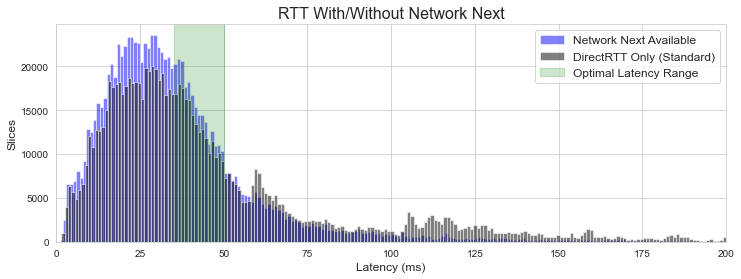

In [23]:
#Plot latency performance with and without next 
plt.figure(figsize=(12,4))
nBins = 200
plt.xlim(0, 200)

#create new column with overall RTT with Network Next available
networkData_cleaned['overallRTT_withNN'] = networkData_cleaned['directRTT'].where(networkData_cleaned['next']==False, networkData_cleaned['nextRTT'])
#networkData_cleaned.head(475)

#histogram directRTT for all slices and RTT with Nextwork Next service
plt.hist(networkData_cleaned[networkData_cleaned['overallRTT_withNN']<200]['overallRTT_withNN'], color='b', alpha=.5, label="Network Next Available", bins=nBins)
plt.hist(networkData_cleaned[networkData_cleaned['directRTT']<200]['directRTT'], color='k', alpha=.5, label="DirectRTT Only (Standard)", bins=nBins)

#Highlight "good" RTT range
plt.axvspan(35, 50, alpha=0.2, color='green', label='Optimal Latency Range')

plt.legend(fontsize=12)
plt.title('RTT With/Without Network Next',fontsize=16)
plt.xlabel('Latency (ms)', fontsize=12)
plt.ylabel('Slices', fontsize=12)
plt.show()

Here I have plotted the distributions of slices for the scenarios where Network Next's service is used (latency is measured as directRTT when next==False and by nextRTT when next==True) and where only the standard path is used for network traffic (latency is measured as directRTT for all slices). It is seen that with Network Next's service available, the latency distribution is significantly improved than the scenario where the standard path is used for network traffic. I highlighted the identified optimal "good" range for latency in green, and it is clear that more slices fall into this range when Network Next is employed compared to when directRTT is used exclusively. The number of high-latency slices is also significantly reduced in the case where Network Next is used.

To further quantify this, I think it would be useful to next calculate the percentage of slices falling above, below, and within the optimal "good" latency range.

In [24]:
#calculate perentage of data in each latency range
percentOptimal_withNN = round((networkData_cleaned[(networkData_cleaned['overallRTT_withNN']>=35) & (networkData_cleaned['overallRTT_withNN']<=50)].shape[0]/networkData_cleaned.shape[0])*100., 1)
percentLow_withNN = round((networkData_cleaned[networkData_cleaned['overallRTT_withNN']<35].shape[0]/networkData_cleaned.shape[0])*100., 1)
percentHigh_withNN = round((networkData_cleaned[networkData_cleaned['overallRTT_withNN']>50].shape[0]/networkData_cleaned.shape[0])*100., 1)

percentOptimal_standard = round((networkData_cleaned[(networkData_cleaned['directRTT']>=35) & (networkData_cleaned['directRTT']<=50)].shape[0]/networkData_cleaned.shape[0])*100., 1)
percentLow_standard = round((networkData_cleaned[networkData_cleaned['directRTT']<35].shape[0]/networkData_cleaned.shape[0])*100., 1)
percentHigh_standard = round((networkData_cleaned[networkData_cleaned['directRTT']>50].shape[0]/networkData_cleaned.shape[0])*100., 1)

#present calculations in table form
calcs = {
    'Scenario': ['Network Next Available', 'DirectRTT Only (Standard)'],
    'Within Optimal Range': [str(percentOptimal_withNN)+"%", str(percentOptimal_standard)+"%"],
    'Lower Latency Range': [str(percentLow_withNN)+"%", str(percentLow_standard)+"%"],
    'Higher Latency Range': [str(percentHigh_withNN)+"%", str(percentHigh_standard)+"%"],
}

table = pd.DataFrame(data=calcs)
HTML(table.to_html(index=False))


So using Network Next results in a higher percentage of slices with latencey in the optimal range of 35-50 ms, or even lower. Awesome!

Now I am curious to do the same comparison for jitter and packet loss.

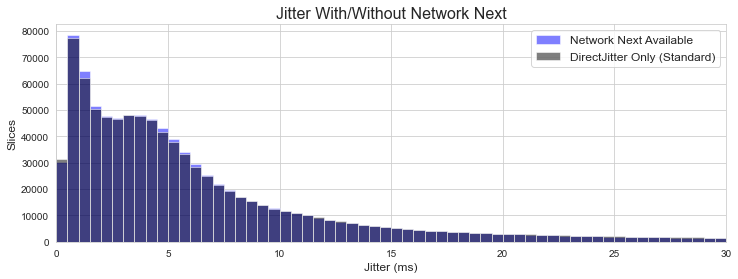

In [25]:
#Plot jitter performance with and without next 
plt.figure(figsize=(12,4))
nBins = 60
plt.xlim(0, 30)

#create new column with overall jitter with Network Next available
networkData_cleaned['overallJitter_withNN'] = networkData_cleaned['directJitter'].where(networkData_cleaned['next']==False, networkData_cleaned['nextJitter'])
#networkData_cleaned.head(475)

#histogram directRTT for all slices and RTT with Nextwork Next service
plt.hist(networkData_cleaned[networkData_cleaned['overallJitter_withNN']<30]['overallJitter_withNN'], color='b', alpha=.5, label="Network Next Available", bins=nBins)
plt.hist(networkData_cleaned[networkData_cleaned['directJitter']<30]['directJitter'], color='k', alpha=.5, label="DirectJitter Only (Standard)", bins=nBins)

plt.legend(fontsize=12)
plt.title('Jitter With/Without Network Next',fontsize=16)
plt.xlabel('Jitter (ms)', fontsize=12)
plt.ylabel('Slices', fontsize=12)
plt.show()

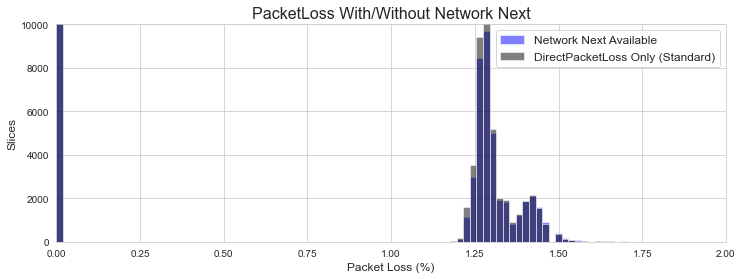

In [26]:
#Plot packet loss performance with and without next 
plt.figure(figsize=(12,4))
nBins = 100
plt.xlim(0, 2)
plt.ylim(0,10000)

#create new column with overall jitter with Network Next available
networkData_cleaned['overallPacketLoss_withNN'] = networkData_cleaned['directPacketLoss'].where(networkData_cleaned['next']==False, networkData_cleaned['nextPacketLoss'])
#networkData_cleaned.head(475)

#histogram directRTT for all slices and RTT with Nextwork Next service
plt.hist(networkData_cleaned[networkData_cleaned['overallPacketLoss_withNN']<2]['overallPacketLoss_withNN'], color='b', alpha=.5, label="Network Next Available", bins=nBins)
plt.hist(networkData_cleaned[networkData_cleaned['directPacketLoss']<2]['directPacketLoss'], color='k', alpha=.5, label="DirectPacketLoss Only (Standard)", bins=nBins)

plt.legend(fontsize=12)
plt.title('PacketLoss With/Without Network Next',fontsize=16)
plt.xlabel('Packet Loss (%)', fontsize=12)
plt.ylabel('Slices', fontsize=12)
plt.show()

The above two plots of jitter and packet loss for sceanrios where Network Next's service is used versus only the standard paths of network traffic again show that the distributions of these metrics are quite similar under these scenarios. It seems that the primary benefit of using Network Next's service is in the form of reducing latency (as one might expect).

#### Investigating network performance metrics with different connection and platform types

Next, I am interested to see if the network performance metrics show any interesting behavior when considering the connection and platform types used in each session. I will again start by calculating the average per slice values of the RTT, Jitter, and Packet Loss.

In [27]:
#analyze per-slice performance indicator values with and without Network Next acceleration
#do for each connection type

#make dataframes with only slices where Next is active/innactive for each connection type
networkData_next_unknown = networkData_cleaned[(networkData_cleaned['next']==True) & (networkData_cleaned['connectionType']==0)]
networkData_next_wired = networkData_cleaned[(networkData_cleaned['next']==True) & (networkData_cleaned['connectionType']==1)]
networkData_next_wifi = networkData_cleaned[(networkData_cleaned['next']==True) & (networkData_cleaned['connectionType']==2)]
networkData_next_cellular = networkData_cleaned[(networkData_cleaned['next']==True) & (networkData_cleaned['connectionType']==3)]

networkData_nonNext_unknown = networkData_cleaned[(networkData_cleaned['next']==False) & (networkData_cleaned['connectionType']==0)]
networkData_nonNext_wired = networkData_cleaned[(networkData_cleaned['next']==False) & (networkData_cleaned['connectionType']==1)]
networkData_nonNext_wifi = networkData_cleaned[(networkData_cleaned['next']==False) & (networkData_cleaned['connectionType']==2)]
networkData_nonNext_cellular = networkData_cleaned[(networkData_cleaned['next']==False) & (networkData_cleaned['connectionType']==3)]

#calculate per-slice averages
totalEntries_next_unknown = networkData_next_unknown.shape[0]
totalEntries_next_wired = networkData_next_wired.shape[0]
totalEntries_next_wifi = networkData_next_wifi.shape[0]
totalEntries_next_cellular = networkData_next_cellular.shape[0]

totalEntries_nonNext_unknown = networkData_nonNext_unknown.shape[0]
totalEntries_nonNext_wired = networkData_nonNext_wired.shape[0]
totalEntries_nonNext_wifi = networkData_nonNext_wifi.shape[0]
totalEntries_nonNext_cellular = networkData_nonNext_cellular.shape[0]

#avgDirectRTT_overall =  networkData_cleaned['directRTT'].sum()/totalEntries_overall
avgDirectRTT_nonNext_unknown =  networkData_nonNext_unknown['directRTT'].sum()/totalEntries_nonNext_unknown
avgDirectRTT_nonNext_wired =  networkData_nonNext_wired['directRTT'].sum()/totalEntries_nonNext_wired
avgDirectRTT_nonNext_wifi =  networkData_nonNext_wifi['directRTT'].sum()/totalEntries_nonNext_wifi
avgDirectRTT_nonNext_cellular =  networkData_nonNext_cellular['directRTT'].sum()/totalEntries_nonNext_cellular

avgDirectRTT_next_unknown =  networkData_next_unknown['directRTT'].sum()/totalEntries_next_unknown
avgDirectRTT_next_wired =  networkData_next_wired['directRTT'].sum()/totalEntries_next_wired
avgDirectRTT_next_wifi =  networkData_next_wifi['directRTT'].sum()/totalEntries_next_wifi
avgDirectRTT_next_cellular =  networkData_next_cellular['directRTT'].sum()/totalEntries_next_cellular

avgNextRTT_next_unknown =  networkData_next_unknown['nextRTT'].sum()/totalEntries_next_unknown
avgNextRTT_next_wired =  networkData_next_wired['nextRTT'].sum()/totalEntries_next_wired
avgNextRTT_next_wifi =  networkData_next_wifi['nextRTT'].sum()/totalEntries_next_wifi
avgNextRTT_next_cellular =  networkData_next_cellular['nextRTT'].sum()/totalEntries_next_cellular


#avgDirectJitter_overall =  networkData_cleaned['directJitter'].sum()/totalEntries_overall
avgDirectJitter_nonNext_unknown =  networkData_nonNext_unknown['directJitter'].sum()/totalEntries_nonNext_unknown
avgDirectJitter_nonNext_wired =  networkData_nonNext_wired['directJitter'].sum()/totalEntries_nonNext_wired
avgDirectJitter_nonNext_wifi =  networkData_nonNext_wifi['directJitter'].sum()/totalEntries_nonNext_wifi
avgDirectJitter_nonNext_cellular =  networkData_nonNext_cellular['directJitter'].sum()/totalEntries_nonNext_cellular

avgDirectJitter_next_unknown =  networkData_next_unknown['directJitter'].sum()/totalEntries_next_unknown
avgDirectJitter_next_wired =  networkData_next_wired['directJitter'].sum()/totalEntries_next_wired
avgDirectJitter_next_wifi =  networkData_next_wifi['directJitter'].sum()/totalEntries_next_wifi
avgDirectJitter_next_cellular =  networkData_next_cellular['directJitter'].sum()/totalEntries_next_cellular

avgNextJitter_next_unknown =  networkData_next_unknown['nextJitter'].sum()/totalEntries_next_unknown
avgNextJitter_next_wired =  networkData_next_wired['nextJitter'].sum()/totalEntries_next_wired
avgNextJitter_next_wifi =  networkData_next_wifi['nextJitter'].sum()/totalEntries_next_wifi
avgNextJitter_next_cellular =  networkData_next_cellular['nextJitter'].sum()/totalEntries_next_cellular

#avgDirectPacketLoss_overall =  networkData_cleaned['directPacketLoss'].sum()/totalEntries_overall
avgDirectPacketLoss_nonNext_unknown =  networkData_nonNext_unknown['directPacketLoss'].sum()/totalEntries_nonNext_unknown
avgDirectPacketLoss_nonNext_wired =  networkData_nonNext_wired['directPacketLoss'].sum()/totalEntries_nonNext_wired
avgDirectPacketLoss_nonNext_wifi =  networkData_nonNext_wifi['directPacketLoss'].sum()/totalEntries_nonNext_wifi
avgDirectPacketLoss_nonNext_cellular =  networkData_nonNext_cellular['directPacketLoss'].sum()/totalEntries_nonNext_cellular

avgDirectPacketLoss_next_unknown =  networkData_next_unknown['directPacketLoss'].sum()/totalEntries_next_unknown
avgDirectPacketLoss_next_wired =  networkData_next_wired['directPacketLoss'].sum()/totalEntries_next_wired
avgDirectPacketLoss_next_wifi =  networkData_next_wifi['directPacketLoss'].sum()/totalEntries_next_wifi
avgDirectPacketLoss_next_cellular =  networkData_next_cellular['directPacketLoss'].sum()/totalEntries_next_cellular

avgNextPacketLoss_next_unknown =  networkData_next_unknown['nextPacketLoss'].sum()/totalEntries_next_unknown
avgNextPacketLoss_next_wired =  networkData_next_wired['nextPacketLoss'].sum()/totalEntries_next_wired
avgNextPacketLoss_next_wifi =  networkData_next_wifi['nextPacketLoss'].sum()/totalEntries_next_wifi
avgNextPacketLoss_next_cellular =  networkData_next_cellular['nextPacketLoss'].sum()/totalEntries_next_cellular

print(avgDirectRTT_overall, avgDirectRTT_nonNext_unknown, avgDirectRTT_nonNext_wired, avgDirectRTT_nonNext_wifi, avgDirectRTT_nonNext_cellular, avgDirectRTT_next_unknown, avgDirectRTT_next_wired, avgDirectRTT_next_wifi, avgDirectRTT_next_cellular, avgNextRTT_next_unknown, avgNextRTT_next_wired, avgNextRTT_next_wifi, avgNextRTT_next_cellular)
print(avgDirectJitter_overall, avgDirectJitter_nonNext_unknown, avgDirectJitter_nonNext_wired, avgDirectJitter_nonNext_wifi, avgDirectJitter_nonNext_cellular, avgDirectJitter_next_unknown, avgDirectJitter_next_wired, avgDirectJitter_next_wifi, avgDirectJitter_next_cellular, avgNextJitter_next_unknown, avgNextJitter_next_wired, avgNextJitter_next_wifi, avgNextJitter_next_cellular)
print(avgDirectPacketLoss_overall, avgDirectPacketLoss_nonNext_unknown, avgDirectPacketLoss_nonNext_wired, avgDirectPacketLoss_nonNext_wifi, avgDirectPacketLoss_nonNext_cellular, avgDirectPacketLoss_next_unknown, avgDirectPacketLoss_next_wired, avgDirectPacketLoss_next_wifi, avgDirectPacketLoss_next_cellular, avgNextPacketLoss_next_unknown, avgNextPacketLoss_next_wired, avgNextPacketLoss_next_wifi, avgNextPacketLoss_next_cellular)


48.987981038104714 33.188410808 34.66786251303751 36.01463562523575 nan 43.60254643283582 88.70399073922178 76.3412130519113 nan 34.480093492537314 37.75880322118957 38.23712504413337 nan
13.242519795703272 12.945247135199997 5.503068731066129 15.658177336971594 nan 9.645300851791047 8.918353083654075 23.449202313845753 nan 1.2353565576119405 7.060040238629732 21.031662576608916 nan
1.0256695050209448 0.3056514096 0.23283707633594064 0.4120673873499298 nan 0.0 2.356588071295736 2.85449072723128 nan 0.03827647910447761 1.5773429696239936 2.1321473385222145 nan


C:\Users\breyn\AppData\Local\Temp\ipykernel_149052\1970623925.py:30: RuntimeWarning: invalid value encountered in double_scalars
  avgDirectRTT_nonNext_cellular =  networkData_nonNext_cellular['directRTT'].sum()/totalEntries_nonNext_cellular
C:\Users\breyn\AppData\Local\Temp\ipykernel_149052\1970623925.py:35: RuntimeWarning: invalid value encountered in double_scalars
  avgDirectRTT_next_cellular =  networkData_next_cellular['directRTT'].sum()/totalEntries_next_cellular
C:\Users\breyn\AppData\Local\Temp\ipykernel_149052\1970623925.py:40: RuntimeWarning: invalid value encountered in double_scalars
  avgNextRTT_next_cellular =  networkData_next_cellular['nextRTT'].sum()/totalEntries_next_cellular
C:\Users\breyn\AppData\Local\Temp\ipykernel_149052\1970623925.py:47: RuntimeWarning: invalid value encountered in double_scalars
  avgDirectJitter_nonNext_cellular =  networkData_nonNext_cellular['directJitter'].sum()/totalEntries_nonNext_cellular
C:\Users\breyn\AppData\Local\Temp\ipykernel_1490

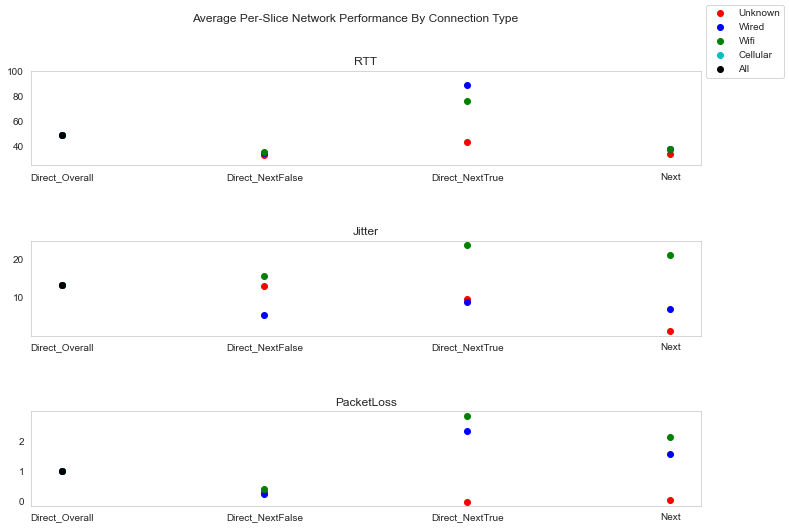

In [28]:
#plot average performance metrics
x = ['Direct_Overall', 'Direct_NextFalse', 'Direct_NextTrue', 'Next']
y_RTT_unknown = [avgDirectRTT_overall, avgDirectRTT_nonNext_unknown, avgDirectRTT_next_unknown, avgNextRTT_next_unknown]
y_RTT_wired = [avgDirectRTT_overall, avgDirectRTT_nonNext_wired, avgDirectRTT_next_wired, avgNextRTT_next_wired]
y_RTT_wifi = [avgDirectRTT_overall, avgDirectRTT_nonNext_wifi, avgDirectRTT_next_wifi, avgNextRTT_next_wifi]
y_RTT_cellular = [avgDirectRTT_overall, avgDirectRTT_nonNext_cellular, avgDirectRTT_next_cellular, avgNextRTT_next_cellular]

y_Jitter_unknown = [avgDirectJitter_overall, avgDirectJitter_nonNext_unknown, avgDirectJitter_next_unknown, avgNextJitter_next_unknown]
y_Jitter_wired = [avgDirectJitter_overall, avgDirectJitter_nonNext_wired, avgDirectJitter_next_wired, avgNextJitter_next_wired]
y_Jitter_wifi = [avgDirectJitter_overall, avgDirectJitter_nonNext_wifi, avgDirectJitter_next_wifi, avgNextJitter_next_wifi]
y_Jitter_cellular = [avgDirectJitter_overall, avgDirectJitter_nonNext_cellular, avgDirectJitter_next_cellular, avgNextJitter_next_cellular]

y_PacketLoss_unknown = [avgDirectPacketLoss_overall, avgDirectPacketLoss_nonNext_unknown, avgDirectPacketLoss_next_unknown, avgNextPacketLoss_next_unknown]
y_PacketLoss_wired = [avgDirectPacketLoss_overall, avgDirectPacketLoss_nonNext_wired, avgDirectPacketLoss_next_wired, avgNextPacketLoss_next_wired]
y_PacketLoss_wifi = [avgDirectPacketLoss_overall, avgDirectPacketLoss_nonNext_wifi, avgDirectPacketLoss_next_wifi, avgNextPacketLoss_next_wifi]
y_PacketLoss_cellular = [avgDirectPacketLoss_overall, avgDirectPacketLoss_nonNext_cellular, avgDirectPacketLoss_next_cellular, avgNextPacketLoss_next_cellular]

y_RTT_overall = [avgDirectRTT_overall, np.NaN, np.NaN, np.NaN]
y_Jitter_overall = [avgDirectJitter_overall, np.NaN, np.NaN, np.NaN]
y_PacketLoss_overall = [avgDirectPacketLoss_overall, np.NaN, np.NaN, np.NaN]

fig, axs = plt.subplots(3, figsize=(12,8))
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
#gs = fig.add_gridspec(3, hspace=1)
#axs = gs.subplots()
fig.suptitle('Average Per-Slice Network Performance By Connection Type')
plt.subplots_adjust(hspace=0.8)

axs[0].set_ylim([25, 100])
axs[0].scatter(x, y_RTT_unknown, c='r', label='Unknown')
axs[0].scatter(x, y_RTT_wired, c='b', label='Wired')
axs[0].scatter(x, y_RTT_wifi, c='g', label='Wifi')
axs[0].scatter(x, y_RTT_cellular, c='c', label='Cellular')
axs[0].scatter(x, y_RTT_overall, c='k', label='All')
axs[0].set_title('RTT')

#plt.legend(loc='upper right')

axs[1].scatter(x, y_Jitter_unknown, c='r', label='Unknown')
axs[1].scatter(x, y_Jitter_wired, c='b', label='Wired')
axs[1].scatter(x, y_Jitter_wifi, c='g', label='Wifi')
axs[1].scatter(x, y_Jitter_cellular, c='c', label='Cellular')
axs[1].scatter(x, y_Jitter_overall, c='k', label='All')
axs[1].set_title('Jitter')

axs[2].scatter(x, y_PacketLoss_unknown, c='r', label='Unknown')
axs[2].scatter(x, y_PacketLoss_wired, c='b', label='Wired')
axs[2].scatter(x, y_PacketLoss_wifi, c='g', label='Wifi')
axs[2].scatter(x, y_PacketLoss_cellular, c='c', label='Cellular')
axs[2].scatter(x, y_PacketLoss_overall, c='k', label='All')
axs[2].set_title('PacketLoss')

handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')


In [29]:
networkData_cleaned[networkData_cleaned['connectionType']==0].count()

sessionid                   192
timestamp                   192
sliceNumber                 192
next                        192
directRTT                   192
directJitter                192
directPacketLoss            192
nextRTT                      67
nextJitter                   67
nextPacketLoss               67
userHash                    192
latitude                    192
longitude                   192
connectionType              192
platformType                192
overallRTT_withNN           192
overallJitter_withNN        192
overallPacketLoss_withNN    192
dtype: int64

I notice a few observations from investigating the network performance metrics under different connection types. First, I see little difference in latency with different connection types regarding nextRTT associated with accelerated slices, and very little difference in directRTT associated with unaccelerated slices. As expected, the average latency as measured by directRTT when slices are accelerated is significantly higher than the nextRTT in these cases.

The jitter appears to be higher for wifi connections than the other connection types, and the difference is most pronounced in accelerated slices. This is something that I am interested in taking a closer look at.

Slices with an unknown connection type appear to deviate from the others in terms of average performance metric scores in some cases, but a closer inspection of the data reveals that there is not a statistically significant amount of data for this connection type. So I do not put much stock in this deviation. 

It seems that network acceleration is either unused or unavailable for cellular connections, or simply that there are no sessions in the dataset using cellular connections.

In [30]:
networkData[networkData['connectionType']==3].shape

(0, 15)

Going back and checking, I can confirm that there are no sessions using a cellular connection represented in the supplied dataset.

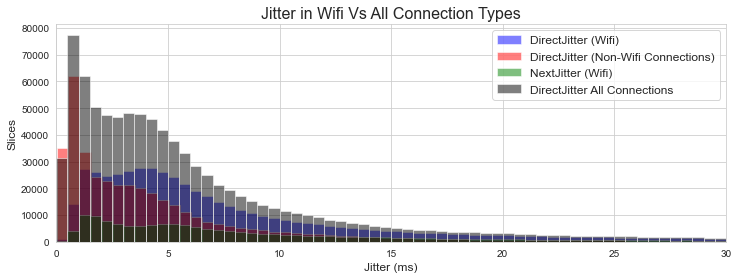

In [31]:
#Plot jitter performance for wifi connections versus others 
plt.figure(figsize=(12,4))
nBins = 60
plt.xlim(0, 30)

#create new column with overall jitter with Network Next available
#networkData_cleaned['overallJitter_withNN'] = networkData_cleaned['directJitter'].where(networkData_cleaned['next']==False, networkData_cleaned['nextJitter'])
#networkData_cleaned.head(475)

#histogramw
plt.hist(networkData_cleaned[(networkData_cleaned['connectionType']==2) & (networkData_cleaned['directJitter']<30)]['directJitter'], color='b', alpha=.5, label="DirectJitter (Wifi)", bins=nBins)
plt.hist(networkData_cleaned[(networkData_cleaned['connectionType']!=2) & (networkData_cleaned['directJitter']<30)]['directJitter'], color='r', alpha=.5, label="DirectJitter (Non-Wifi Connections)", bins=nBins)
#plt.hist(networkData_cleaned[(networkData_cleaned['connectionType']==2) & (networkData_cleaned['next']==True) & (networkData_cleaned['directJitter']<30)]['directJitter'], color='r', alpha=.5, label="DirectJitter_Accelerated (Wifi)", bins=nBins)
plt.hist(networkData_cleaned[(networkData_cleaned['connectionType']==2) & (networkData_cleaned['next']==True) & (networkData_cleaned['nextJitter']<30)]['nextJitter'], color='g', alpha=.5, label="NextJitter (Wifi)", bins=nBins)
plt.hist(networkData_cleaned[networkData_cleaned['directJitter']<30]['directJitter'], color='k', alpha=.5, label="DirectJitter All Connections", bins=nBins)

plt.legend(fontsize=12)
plt.title('Jitter in Wifi Vs All Connection Types',fontsize=16)
plt.xlabel('Jitter (ms)', fontsize=12)
plt.ylabel('Slices', fontsize=12)
plt.show()

Investigating the distributions of jitter per slice for different connection types shows that there is a more distinct local maximum centered around approx. 4 ms for slices with wifi connection types that is not as pronounced in the other connection types. This local maximum appears to exist in both the directJitter and nextJitter distributions. Perhaps there is some domain knowledge that explains this distribution shape.

Next, I would like to investigate the network performance metrics for the different platform types. Because there are ten different platforms, I think it will be easier to first try to identify any differences with a box plot instead of calculating averages and distributions for all platform types.

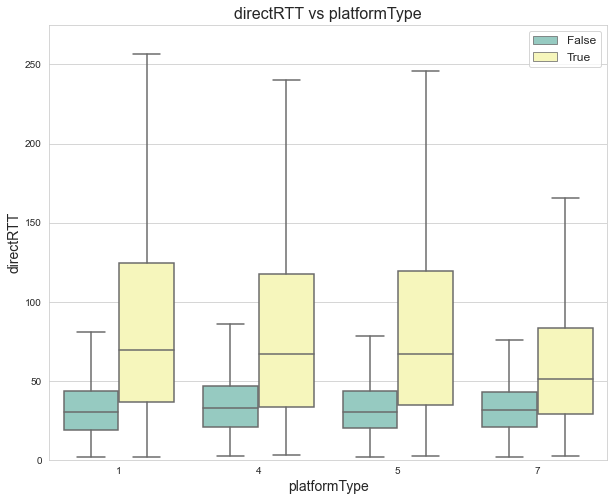

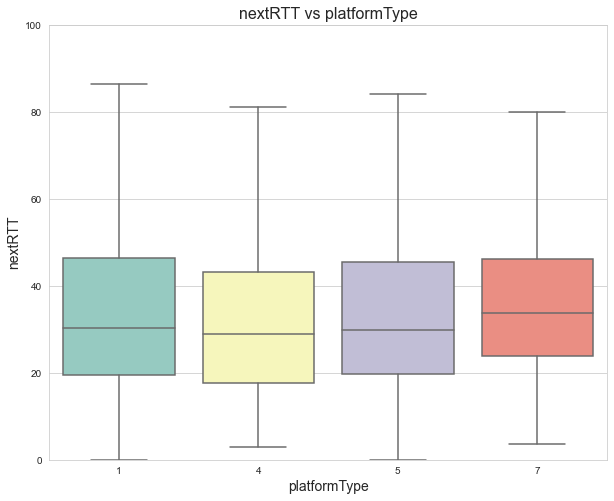

In [32]:
plt.figure(figsize=(10,8))
plt.ylim(0, 275)
sns.boxplot(x="platformType", y="directRTT", hue="next", data=networkData_cleaned, palette="Set3", showfliers=False)
plt.legend(fontsize=12)
plt.title('directRTT vs platformType', fontsize=16)
plt.xlabel('platformType', fontsize=14)
plt.ylabel('directRTT', fontsize=14)
plt.show()

plt.figure(figsize=(10,8))
plt.ylim(0, 100)
sns.boxplot(x="platformType", y="nextRTT", data=networkData_cleaned, palette="Set3", showfliers=False)
plt.title('nextRTT vs platformType', fontsize=16)
plt.xlabel('platformType', fontsize=14)
plt.ylabel('nextRTT', fontsize=14)
plt.show()


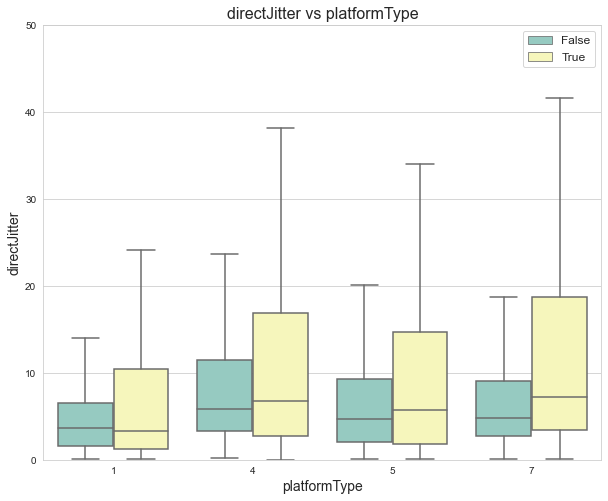

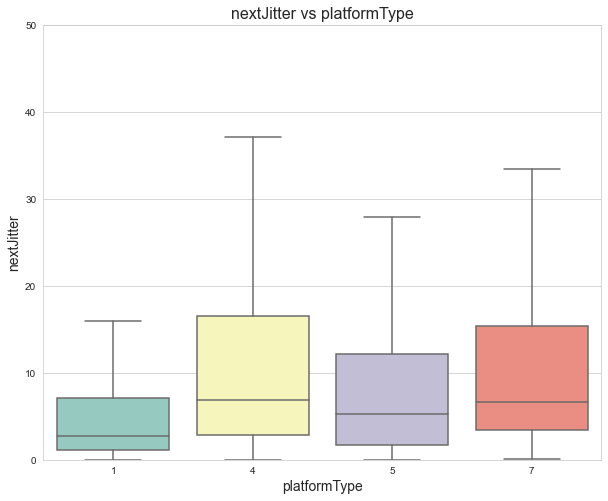

In [33]:
plt.figure(figsize=(10,8))
plt.ylim(0, 50)
sns.boxplot(x="platformType", y="directJitter", hue="next", data=networkData_cleaned, palette="Set3", showfliers=False)
plt.legend(fontsize=12)
plt.title('directJitter vs platformType', fontsize=16)
plt.xlabel('platformType', fontsize=14)
plt.ylabel('directJitter', fontsize=14)
plt.show()

plt.figure(figsize=(10,8))
plt.ylim(0, 50)
sns.boxplot(x="platformType", y="nextJitter", data=networkData_cleaned, palette="Set3", showfliers=False)
plt.title('nextJitter vs platformType', fontsize=16)
plt.xlabel('platformType', fontsize=14)
plt.ylabel('nextJitter', fontsize=14)
plt.show()

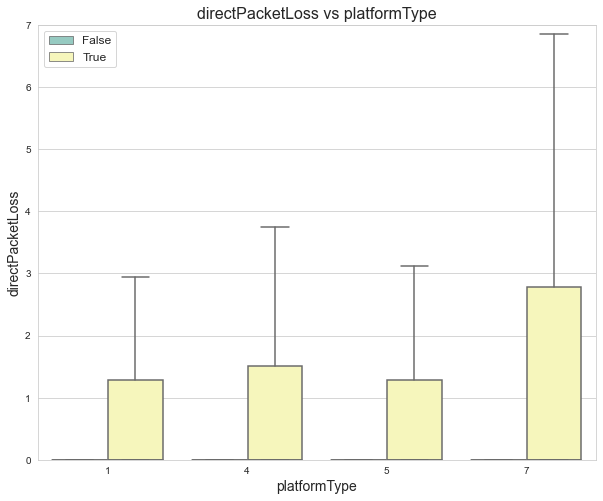

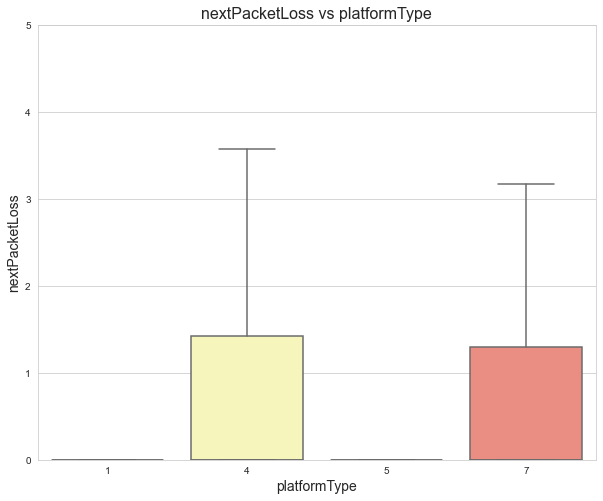

In [34]:

plt.figure(figsize=(10,8))
plt.ylim(0, 7)
sns.boxplot(x="platformType", y="directPacketLoss", hue="next", data=networkData_cleaned, palette="Set3", showfliers=False)
plt.legend(fontsize=12)
plt.title('directPacketLoss vs platformType', fontsize=16)
plt.xlabel('platformType', fontsize=14)
plt.ylabel('directPacketLoss', fontsize=14)
plt.show()

plt.figure(figsize=(10,8))
plt.ylim(0, 5)
sns.boxplot(x="platformType", y="nextPacketLoss", data=networkData_cleaned, palette="Set3", showfliers=False)
plt.title('nextPacketLoss vs platformType', fontsize=16)
plt.xlabel('platformType', fontsize=14)
plt.ylabel('nextPacketLoss', fontsize=14)
plt.show()

The above box plots invesigate the three network performance metrics for each of the platform types represented in the dataset. The game seems to have been released on Windows (1), Nintendo Switch (4), Playstation 4 (5), and Xbox One (7) only. 

In terms of latency, there are only negligible differences in network performance between platforms. Jitter also displays fairly consistent performance between platforms, with slices coming from windows platforms experiencing a bit less jitter than the others. Packet loss appears to have the largest disparity in performance between platforms, where it is seen that Windows and Playstation 4 platforms experience nearly zero percent package loss, but the Nintendo Switch and Xbox One platforms see an increase in non-zero entries. However, the packet loss is still low for these two platforms, with the third quartile of data remaining below about 1.5%, so I believe this is unlikely to represent an issue.

#### Location Data

Since we have location data for the users playing this game, I thought it would be interesting to see where the users are and to check if there are any regions that seem to benefit more from Network Next's service than others.

I've downloaded the Plotly package to use the world map feature to plot location data. When run in this Jupyter Notebook, the maps are interactive and can be zoomed in to see finer detail in different regions. Note that the color of the markers corresponds to if a session employed network acceleration at any point during its duration, or if it used purely standard paths for network traffic.

In [52]:
#The full dataset is quite large and contains many duplicate (latitude, longitude) points for the same sessions,
#so I want to make an abbreviated dataframe that still tells me where players are located and if thet used Next acceleration
#but I do not want multiple coordinate points for the same player
locationData = networkData_cleaned.copy()
locationData = locationData[['sessionid', 'next', 'userHash', 'latitude', 'longitude', 'connectionType', 'platformType']]
print(locationData.shape[0])
locationData.drop_duplicates(inplace=True)
locationData.reset_index(inplace=True)
#locationData.rename(columns={"index": "original_index"})
print(locationData.shape[0])
locationData.head(50)

#locationData[(locationData['latitude']==0.0000) & (locationData['longitude']==0.0000)].head()

967308
24935


index            sessionid   next             userHash  latitude  \
0    762212 -9222766980438305802  False -9102495143376997791   41.8183   
1   1136757 -9222000346158437530  False  3815087660763149607   32.8685   
2    763082 -9221499073410237622  False  5362131968915420490   53.1659   
3    763390 -9221266712617725231  False  -757974270091717420   41.8904   
4    763380 -9221266712617725231   True  -757974270091717420   41.8904   
5    761857 -9221216468857363620  False  -807702928420421476   19.4588   
6    759529 -9220910205973241314  False -4792161209807875585   24.1440   
7    761210 -9220025044315788835  False  7723187159016220983   38.1176   
8   1136408 -9217779750507134191  False -5376148706296556815   24.9389   
9   1136319 -9217779750507134191   True -5376148706296556815   24.9389   
10   762925 -9216595183381493514  False -7929171161401690438   53.1447   
11   289315 -9216544692736712906  False  3201698728542134698   55.8486   
12   760577 -9215290556041125693  False -2982618909363293175  -41.3675   
13   882777 -9214519254449692591  False  8423944733135078558   30.2944   
14   882581 -9214519254449692591   True  8423944733135078558   30.2944   
15    13608 -9214329853984816792  False -8931959616319302551   41.8860   
16   761474 -9212057148139746676  False  7578914738267842635    4.6351   
17   249248 -9212033114856777973  False -7670491561024205841   36.9201   
18   759761 -9210743895497126225  False    42949313805150167   40.0881   
19   761025 -9210614193292243303  False -7314622990915858421   40.8627   
20   761626 -9210243286893602745  False -4367685611376641767   41.0429   
21   364125 -9208286049748683812  False -1565963210944866555   51.3986   
22   364118 -9208178178689667298  False  8800598211479180928   38.2676   
23   761392 -9208170788057145414  False -8292009960547380055   13.6769   
24     9715 -9207148177807427287  False -1990239657272404889   18.3861   
25   760405 -9204743841602333881  False -1711892458042585565   26.5170   
26  1136457 -9204632085314078082  False  7576399839805344061   31.6182   
27  1136322 -9204632085314078082   True  7576399839805344061   31.6182   
28   763525 -9203832314038644857  False  5810449182421635583   34.9091   
29     9812 -9203763488226765935  False  3776549239946478101   41.2615   
30   760157 -9203584531402215604  False  8225749799327636680   34.1211   
31   759855 -9203537313748274736  False   507230406611067713   41.0280   
32   882839 -9202786721453343073  False  -372270807622312858   35.6096   
33   882837 -9202786721453343073   True  -372270807622312858   35.6096   
34   760895 -9202022868669644650  False  4528225719902940763   43.5991   
35   189028 -9200507052637751834  False  4731889935488525383   24.6569   
36   762817 -9200056366578306653  False  5111971577090481051   38.7310   
37   762687 -9198354042101986148  False  1816573525750392338   43.3115   
38   763522 -9197924632139370306  False -5349833904995771612   35.4346   
39   760951 -9196758825663006383  False -8449113015118119822   51.4899   
40   763084 -9194765294607034264  False  8555421715387433280   36.0812   
41   763120 -9194765294607034264   True  8555421715387433280   36.0812   
42   762340 -9194139078303106633  False -3182788364293890894   38.6273   
43   762342 -9194139078303106633   True -3182788364293890894   38.6273   
44    13532 -9194024674888606751  False  9138713626166526556   40.0711   
45   763238 -9193082027485925758  False  1765390940151934588   43.5428   
46   759966 -9192817946938793792  False -5747456923812554641   32.2960   
47   759894 -9192069587362828686  False  5624526314817077476   41.2327   
48   761776 -9190727212840903326  False  5899440063892720620   44.2454   
49   248807 -9189275679431149727  False -7711155670030362925   41.8018   

    longitude  connectionType  platformType  
0    -87.6095               2             7  
1    -97.2863               2             7  
2     -1.2113               2             7  
3     12.5126               1             7  
4

Great, the duplicate entries have been removed, leaving about 25,000 users with unique sessionid/userHash/location pairings. Some will be repeated if they are associated with slices with next==True and next==False, but the computational needs of plotting a map of user locations should be significantly reduced now.

In [37]:
fig = px.scatter_geo(locationData, lat='latitude', lon='longitude', color='next', opacity=0.5)
fig.update_layout(title = 'World Map', title_x=0.5)
fig.show()

In [38]:
fig = px.scatter_geo(locationData, lat='latitude', lon='longitude', color='next', opacity=0.5, scope='north america')
fig.update_layout(title = 'North America', title_x=0.5)
fig.show()

In [95]:
fig = px.scatter_geo(locationData, lat='latitude', lon='longitude', color='next', opacity=0.5, scope='south america')
fig.update_layout(title = 'South America', title_x=0.5)
fig.show()

In [96]:
fig = px.scatter_geo(locationData, lat='latitude', lon='longitude', color='next', opacity=0.5, scope='europe')
fig.update_layout(title = 'Europe', title_x=0.5)
fig.show()

In [98]:
fig = px.scatter_geo(locationData, lat='latitude', lon='longitude', color='next', opacity=0.5, scope='asia')
fig.update_layout(title = 'Asia', title_x=0.5)
fig.show()

In [99]:
fig = px.scatter_geo(locationData, lat='latitude', lon='longitude', color='next', opacity=0.5, scope='africa')
fig.update_layout(title = 'Africa', title_x=0.5)
fig.show()

Note that zooming in on the maps gives much finer detail. With these maps, I see that the video game associated with this data is played around the world and Network Next's service helps players experience optimal network performance! The user base appears to be especially dense in the United States, Europe, and parts of Asia like Japan and South Korea. When zooming in on individual continents and regions, it appears that Network Next's service is most beneficial (i.e. more frequently used) to users in denser population centers. Naively, this makes sense to me given that I would expect higher levels network traffic within a smaller area to stress standard network paths more.

I am next interested in seeing the breakdown of approximately how many users are associated with each country, and the subset of these users who benefitted from Network Next's service. To do this, I will add a column to my trimmed-down location information dataframe, using the geopy package to match latitude and longitude coordinates to countries. Note that the following code block takes a long time to run, so I will save the output dataframe to a new csv file.

In [103]:
#THIS CODE BLOCK TAKES A VERY LONG TIME TO RUN!
#Use the output csv file instead for future use!

#load geographical data from geopy
geolocator = Nominatim(user_agent="geoapiExercises")

#get lat, long from dataset
#lat = locationData['latitude']
#long = locationData['longitude']

#UNCOMMENT THE FOR LOOP BELOW TO GET COUNTRY CODE DATA
#Commented out so that it doesn't get run by accident, because it takes a very long time to run

#for i in range(len(locationData)):
    #print(locationData.loc[i, "latitude"], locationData.loc[i, "longitude"])
    #tempLat = locationData.loc[i, "latitude"]
    #tempLong = locationData.loc[i, "longitude"]
    #locationData.loc[i, 'country_code'] = geolocator.reverse([tempLat, tempLong]).raw['address']['country_code']
    #if i%100 == 0:
    #    print("users located: ", i)

#locationData.tail()

index            sessionid   next             userHash  latitude  \
24930  308387  9219878304281765479  False  9007467583293070964   33.5593   
24931  308340  9219878304281765479   True  9007467583293070964   33.5593   
24932  260801  9220676160516790830  False   347340859448842605   10.4634   
24933  260800  9220676160516790830   True   347340859448842605   10.4634   
24934  283345  9222804537186130553  False -8794415076258165514   34.1438   

       longitude  connectionType  platformType country_code  
24930   -81.8165               2             7           us  
24931   -81.8165               2             7           us  
24932   -84.6662               2             4           cr  
24933   -84.6662               2             4           cr  
24934  -117.2548               1             7           us

Because it takes a good bit of time to loop through the dataframe and identify the countries associated with the location coordinates, I am saving the user location dataframe to a csv file with this column added so that I can access it again easily if I come back to work on this more in the future.

In [104]:
#Write locationData (now with country codes) to csv to avoid having to re-run the previous code block
locationData.to_csv("userLocationData_withCountryCodes.csv") 

Now that I have the location data for each user, I  will start with some exploratory plots of the number of users per country. As there are clearly more countries in the world than are feasible to put on a single plot (and I have already seen that users are spread across the globe), I will restrict my plots to the top 10 countries by number of users.

I will start by looking at the number of total users per country (any user who is associated with a session in the dataset), as well as the number of users who benefit from Network Next's service to boost network performance (defined as users who were associated with any accelerated slices during their session).

<AxesSubplot:>

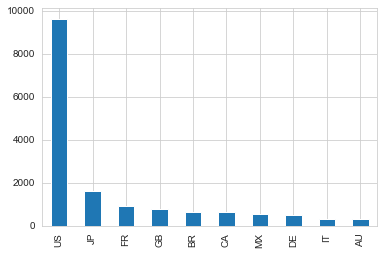

In [151]:
#If starting from csv:
if locationData['country_code'].empty:
    locationData = pd.read_csv("userLocationData_withCountryCodes.csv")

#Capitalize country codes
locationData['country_code'] = locationData['country_code'].str.upper()
    
#Plot users per country (total users and users those benefitting from Network Next's service during their session)

#exploratory plot- show only the top 10 countries by number of users
locationData.groupby('userHash', as_index=False).first().country_code.value_counts().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot:>

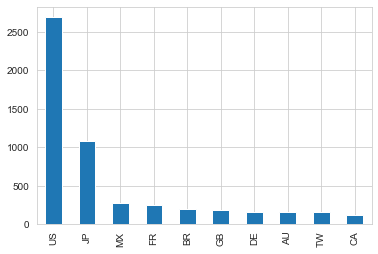

In [152]:
#exploratory plot- users by country that benefit from Network Next's service
locationData[locationData['next']==True].groupby('userHash', as_index=False).first().country_code.value_counts().head(10).plot.bar()

I immediately see the the bulk of the users in this dataset are located in the United States, followed not-so-closely by Japan, and then another significant drop to the other countries, which have similar user numbers. The number of Network Next users shows a similar trend, but Japanese users seem to clearly benefit from Network Next's services quite frequently. I will look at these trends further by plotting the user data side-by-side, and calculating the percentage of Network Next users to be displayed in a data table. 

In [153]:
#top 10 looks okay, I'll make it a little nicer 
#and include info on total users and those benefiting from Network Next's service on one plot
totalUsersByLoc = locationData.groupby('userHash', as_index=False).first().country_code.value_counts().head(10)
nextUsersByLoc = locationData[locationData['next']==True].groupby('userHash', as_index=False).first().country_code.value_counts().head(20)

#make a dataframe with all user count info that I want to plot
df_totalUsersByLoc = pd.DataFrame({'Country Code':totalUsersByLoc.index, 'Total Users':totalUsersByLoc.values})
df_nextUsersByLoc = pd.DataFrame({'Country Code':nextUsersByLoc.index, 'Next Users':nextUsersByLoc.values})

df_usersByLoc = df_totalUsersByLoc.merge(df_nextUsersByLoc, how='inner', on='Country Code')
df_usersByLoc['Percent Next'] =round(((df_usersByLoc['Next Users']/df_usersByLoc['Total Users'])*100.),1) 


df_usersByLoc.head(10)

Country Code  Total Users  Next Users  Percent Next
0           US         9626        2695          28.0
1           JP         1633        1077          66.0
2           FR          931         249          26.7
3           GB          798         178          22.3
4           BR          647         203          31.4
5           CA          632         122          19.3
6           MX          568         281          49.5
7           DE          521         164          31.5
8           IT          337          64          19.0
9           AU          317         162          51.1

<Figure size 720x576 with 0 Axes>

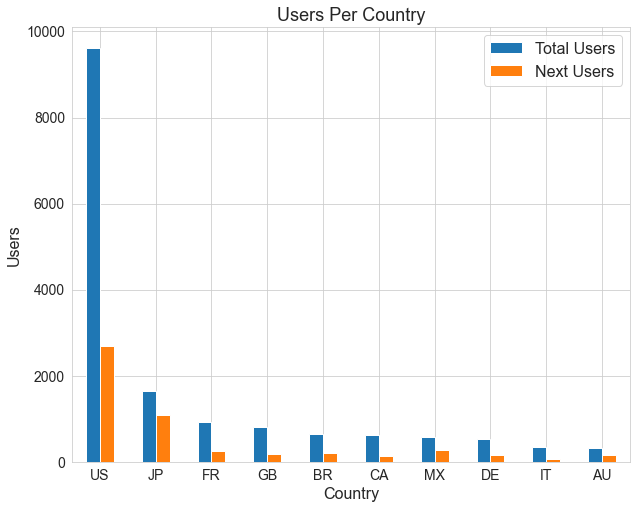

In [154]:
#Now for the final users plot

plt.figure(figsize=(10,8))
ax = df_usersByLoc.plot(x="Country Code", y=["Total Users", "Next Users"], kind="bar", rot=0, figsize=(10, 8))
plt.legend(fontsize=16)
plt.title('Users Per Country', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Users', fontsize=16)
plt.show()

In [155]:
#Make a corresponding data table displaying the percentage of total users that benefit from Network Next by country
HTML(df_usersByLoc.to_html(index=False))

I see that users from Japan, Mexico, and Australia were able to benefit from Network Next network acceleration at least ~50% of the time. It is very interesting to see the global reach of the service!